# Aula 12 - APIs

## Nossa agenda

1.  Como são formadas as APIs REST
1.  Como funciona o protocolo HTTP
1.  Como funciona o pacote Requests
1.  APIs com autenticação
1.  Escrita e leitura de arquivos em Python
1.  O que são arquivos CSV
1.  Usando SQL com Python
1.  Analisando nosso CSV


## Me manda uma mensagem


#wilsontayar no [slack](https://terahq.slack.com)

/wilsontayar no [github](https://github.com/wilsontayar)

@wilsontayar no [twitter](https://twitter.com/wilsontayar)

----

## Como são formadas as APIs REST

Podemos dizer que **uma API é como se fosse uma página da web só que para computadores**. Só eles consegurem acessar, ler e interagir da maneira adequada com as APIs.

Como Data Scientists, vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas. 

APIs são uma das principais formas que um Data Scientist utiliza para obter os dados que devem ser analisados.

---

Como exemplo, ao acessarmos a API da Jsonplaceholder (https://jsonplaceholder.typicode.com/posts/1), vemos o retorno abaixo, ao invés de uma página comum:

```json
{
  "userId": 1,
  "id": 1,
  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
  "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
}
```

Esse padrão de resposta é o que chamamos de **JSON**, e este é o **tipo de resposta mais comum entre as APIs**.

Ele foi feito para que máquinas entendam seus dados e os utilizem como quiser.

---


## Como funciona o protocolo HTTP

A internet trafega através do protocolo HTTP, ou **Hypertext Transfer Protocol**. O protocolo HTTP foi criado por Tim Berners-Lee, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui **duas entidades básicas**: a **Request** (pedido) e a **Response** (resposta)

Sempre que entramos em uma página, **enviamos uma request para o servidor** do site e **esperamos uma response** com o HTML da página.

Sempre que enviamos uma request devemos especificar um **método**.
A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

Método     | Objetivo
-----------|-----------
**GET**    | Obter informações
**POST**   | Salvar informações
**PUT**    | Atualizar informações
**DELETE** | Deletar informações

Todos eles são comumente utilizados por APIs. 

O método **GET** é o que seu navegador usa para baixar o HTML da página.

O metódo **POST** também é muito utilizado sempre que você envia algum formulário em um site.

**Além do método, as requests também possuem um header**

O **Header** (cabeçalho) tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação.
Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.


---

**Todos as respostas possuem, além do conteúdo da resposta, um código de status**.

Os códigos de status (status code) seguem um padrão.

Os mais comuns são:

Código  |  Significado
--------|---------------
200     | Ok
3XX     | O servidor vai te redirecionar para outra URL
4XX     | O recurso não foi encontrado, não está mais disponível, etc
5XX     | Algum problema aconteceu no servidor e ele não conseguiu processar a sua request



---

Outra característica das APIs REST é a **divisão dos recursos**. Por exemplo:

https://jsonplaceholder.typicode.com/users/1

Ao abrirmos esta URL estamos fazendo um **GET** para obtermos informações do usuário (/users) com código 1 (/1).
Podemos trocar o código do usuário para buscar outros usuários.

Também podemos pedir todos os usuários digitando:

https://jsonplaceholder.typicode.com/users

---

Também é muito comum o uso de parâmetros na URL para passarmos filtros para a API. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1

Perceba o "?postId=1" ao final da URL.

Sempre que precisamos passar parâmetros, começamos com um ponto de interrogação (?) e depois utilizamos o & para parâmetros futuros. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1&id=3

## Como funciona o pacote Requests

Como vimos anteriormente, o pacote requests do Python é utilizado para nos comunicarmos com URLs.

Podemos realizar GET, POST, PUT, DELETE e quaisquer outros métodos HTTP com ele.

Veja no exemplo abaixo como podemos fazer isso

In [1]:
import requests

api = requests.get('https://jsonplaceholder.typicode.com/users')

json = api.json()

for user in json:
    print('{0} ({1}) - {2}'.format(user['name'], user['email'], user['website']))

Leanne Graham (Sincere@april.biz) - hildegard.org
Ervin Howell (Shanna@melissa.tv) - anastasia.net
Clementine Bauch (Nathan@yesenia.net) - ramiro.info
Patricia Lebsack (Julianne.OConner@kory.org) - kale.biz
Chelsey Dietrich (Lucio_Hettinger@annie.ca) - demarco.info
Mrs. Dennis Schulist (Karley_Dach@jasper.info) - ola.org
Kurtis Weissnat (Telly.Hoeger@billy.biz) - elvis.io
Nicholas Runolfsdottir V (Sherwood@rosamond.me) - jacynthe.com
Glenna Reichert (Chaim_McDermott@dana.io) - conrad.com
Clementina DuBuque (Rey.Padberg@karina.biz) - ambrose.net


## Exercício - Extraindo Dados do CoinMarketCap via API

Vamos usar o pacote requests para o acessar a API do CoinMarketCap.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/

Deveremos extrair os seguintes dados:
- Nome da moeda
- Preço atual **CONVERTIDO EM REAIS**
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas

Também deveremos limitar para que a API traga apenas 5 moedas para trabalharmos

Tempo: 10 minutos

---

In [4]:
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL&limit=5')

json = api.json()

for moeda in json:
    nome = moeda['name']
    preco = moeda['price_brl']
    valor_mercado = moeda['market_cap_brl']
    em_circulacao = moeda['available_supply']
    percentual_dia = moeda['percent_change_24h']
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

Bitcoin: 28940.47767 (-4.77 / 24h)
Em circulação: 17049150.0
Valor de mercado: 493410544867
-------------
Ethereum: 2327.8910442 (-7.5 / 24h)
Em circulação: 99606442.0
Valor de mercado: 231872943547
-------------
Ripple: 2.329703802 (-5.3 / 24h)
Em circulação: 39189968239.0
Valor de mercado: 91301018007.0
-------------
Bitcoin Cash: 4101.027138 (-6.61 / 24h)
Em circulação: 17142438.0
Valor de mercado: 70301601399.0
-------------
EOS: 44.52417654 (-7.06 / 24h)
Em circulação: 873125544.0
Valor de mercado: 38875195871.0
-------------


## Como utilizar APIs com autenticação

É muito comum encontrarmos APIs que necessitam de autenticação. Isto é, algum identificador que diz para ela quem está requisitando aquela informação.

Para realizarmos autenticação em APIs REST nós normalmente utilizamos um Header e um Token de acesso.

Porém, algumas APIs também utilizam parâmetros para realizar a autenticação.

Abaixo vamos ver como acessar a API da Battuta (https://battuta.medunes.net/) utilizando um token.

A Battuta é um serviço para dados geográficos.

*Aviso para leitores do futuro: se essa key não funcionar, é só entrar no site da battuta e gerar uma nova digitando o seu e-mail.*

In [2]:
import requests

payload = {'key': 'ce46369940c2632e9c160b0474bf49a3'}

api = requests.get('http://battuta.medunes.net/api/country/all/', params=payload)

json = api.json()

for country in json:
    print('{0} ({1})'.format(country['name'], country['code']))

Afghanistan (af)
Albania (al)
Algeria (dz)
Andorra (ad)
Angola (ao)
Anguilla (ai)
Antigua and Barbuda (ag)
Argentina (ar)
Armenia (am)
Aruba (aw)
Australia (au)
Austria (at)
Azerbaijan (az)
Bahamas (bs)
Bahrain (bh)
Bangladesh (bd)
Barbados (bb)
Belarus (by)
Belgium (be)
Belize (bz)
Benin (bj)
Bermuda (bm)
Bhutan (bt)
Bolivia (bo)
Bosnia and Herzegovina (ba)
Botswana (bw)
Brazil (br)
Brunei Darussalam (bn)
Bulgaria (bg)
Burkina Faso (bf)
Burundi (bi)
Cambodia (kh)
Cameroon (cm)
Canada (ca)
Cape Verde (cv)
Cayman Islands (ky)
Central African Republic (cf)
Chad (td)
Chile (cl)
China (cn)
Christmas Island (cx)
Cocos (Keeling) Islands (cc)
Colombia (co)
Comoros (km)
Congo (cg)
Cook Islands (ck)
Costa Rica (cr)
Cote D'Ivoire (Ivory Coast) (ci)
Croatia (Hrvatska) (hr)
Cuba (cu)
Cyprus (cy)
Czech Republic (cz)
Democratic Republic of the Congo (cd)
Denmark (dk)
Djibouti (dj)
Dominica (dm)
Dominican Republic (do)
Ecuador (ec)
Egypt (eg)
El Salvador (sv)
Equatorial Guinea (gq)
Eritrea (er)
Eston

Como você pode ver, utilizamos uma váriavel com todos os parâmetros que gostaríamos de passar.

O pacote requests colocou automaticamente o ponto de interrogação na URL para você!

---

Caso você se depare com uma API que utilize Headers, basta utilizar o exemplo abaixo como base.

---

In [8]:
import requests

h = {'my-custom-header': 'i am the one who knocks'}

r = requests.get('http://battuta.medunes.net/api/country/all/?key=ce46369940c2632e9c160b0474bf49a3', headers=h)

json = r.json()

for country in json:
    print('{0} ({1})'.format(country['name'], country['code']))

Afghanistan (af)
Albania (al)
Algeria (dz)
Andorra (ad)
Angola (ao)
Anguilla (ai)
Antigua and Barbuda (ag)
Argentina (ar)
Armenia (am)
Aruba (aw)
Australia (au)
Austria (at)
Azerbaijan (az)
Bahamas (bs)
Bahrain (bh)
Bangladesh (bd)
Barbados (bb)
Belarus (by)
Belgium (be)
Belize (bz)
Benin (bj)
Bermuda (bm)
Bhutan (bt)
Bolivia (bo)
Bosnia and Herzegovina (ba)
Botswana (bw)
Brazil (br)
Brunei Darussalam (bn)
Bulgaria (bg)
Burkina Faso (bf)
Burundi (bi)
Cambodia (kh)
Cameroon (cm)
Canada (ca)
Cape Verde (cv)
Cayman Islands (ky)
Central African Republic (cf)
Chad (td)
Chile (cl)
China (cn)
Christmas Island (cx)
Cocos (Keeling) Islands (cc)
Colombia (co)
Comoros (km)
Congo (cg)
Cook Islands (ck)
Costa Rica (cr)
Cote D'Ivoire (Ivory Coast) (ci)
Croatia (Hrvatska) (hr)
Cuba (cu)
Cyprus (cy)
Czech Republic (cz)
Democratic Republic of the Congo (cd)
Denmark (dk)
Djibouti (dj)
Dominica (dm)
Dominican Republic (do)
Ecuador (ec)
Egypt (eg)
El Salvador (sv)
Equatorial Guinea (gq)
Eritrea (er)
Eston

## Escrita e leitura de arquivos em Python


Em Python, assim como em outras linguagens de programação, podemos manipular arquivos que estão em nosso disco.

Para isso, utilizamos o `open` para nos trazer um **objeto de arquivo**.

O `open` precisa saber o nome do arquivo para conseguir ler seu conteúdo:

```python
open('nome_do_arquivo')
```

No entanto, existe um segundo argumento que podemos passar para dizer qual o **modo que queremos trabalhar com esse arquivo**.

Abaixo podemos ver exemplos de códigos com os modos mais comuns:

```python
open('nome_do_arquivo', 'r')  #Apenas leitura - padrão quando o modo é omitido

open('nome_do_arquivo', 'r+') #Leitura e escrita

open('nome_do_arquivo', 'w')  #Apenas escrita, apaga tudo que tem no arquivo antes de escrever novamente

open('nome_do_arquivo', 'a')  #"Append", adiciona o que você quiser ao final do arquivo, sem apagar nada
```

Também existe um argumento para passarmos em qual **encoding** gostaríamos de escrever.

```python
open('nome_do_arquivo', 'w', encoding='utf-8')
```

Você pode conferir todos os parâmetros do método `open` aqui: https://docs.python.org/3/library/functions.html#open

Todo o processo de escrita e leitura de arquivos deve ser feita com muito **cuidado**. Como são operações mais lentas, você pode acabar travando seu computador se fizer um loop errado enquanto escreve um arquivo.

Por isso, é muito importante se **lembrar de SEMPRE fechar o arquivo após o uso** dele no Python.

Vamos ver um exemplo:

In [7]:
f = open('arquivo_teste.txt', 'w')

f.write('Alô? Alguém me escuta?')

f.close()

## Porque o Context Manager (with) é necessário

Em Python, podemos pedir ajuda de um **Context Manager para automaticamente fechar o arquivo após o uso**.

Isso é a recomendação das **boas práticas** e evita que seu código tenha bugs.

Para utilizarmos essa funcionalidade, basta utilizar a palavra reservada **with**

Vamos ver um exemplo:

In [10]:
with open('arquivo_teste.txt', 'r') as f:
    print(f.readline())

print('\n\nSerá que o arquivo está fechado? {0}'.format(f.closed))

Alô? Alguém me escuta?


Será que o arquivo está fechado? True


## O que é um arquivo CSV

Arquivos CSV são apenas uma **coleção de dados separados por um caractere especial** (normalmente `,` ou `;`).

Eles são muito importantes para fazer movimentações de dados de um lugar para o outro.

Todos os softwares de planilha do mercado aceitam arquivos CSV.

Alguns cuidados que devemos seguir ao criar um arquivo CSV:

- Sempre terminar as linhas com `\n`
- Sempre utilizar o encoding como `utf-8`
- Utilizar caracteres que não influenciam no dado (ex.: vírgulas para separar dados númericos que também usam vírgulas)

Vamos ver um exemplo de como podemos criar um arquivo CSV em Python a partir do scraping da API do Jsonplaceholder.

In [13]:
import requests

api = requests.get('https://jsonplaceholder.typicode.com/users')

json = api.json()

with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for user in json:
        f.write('{0};{1};{2}\n'.format(user['name'], user['email'], user['website']))

        
# Vamos ler nosso arquivo
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

Leanne Graham;Sincere@april.biz;hildegard.org

Ervin Howell;Shanna@melissa.tv;anastasia.net

Clementine Bauch;Nathan@yesenia.net;ramiro.info

Patricia Lebsack;Julianne.OConner@kory.org;kale.biz

Chelsey Dietrich;Lucio_Hettinger@annie.ca;demarco.info

Mrs. Dennis Schulist;Karley_Dach@jasper.info;ola.org

Kurtis Weissnat;Telly.Hoeger@billy.biz;elvis.io

Nicholas Runolfsdottir V;Sherwood@rosamond.me;jacynthe.com

Glenna Reichert;Chaim_McDermott@dana.io;conrad.com

Clementina DuBuque;Rey.Padberg@karina.biz;ambrose.net



## Exercício - CSV com os dados do CoinMarketCap

Vamos usar o pacote requests para o acessar a API do CoinMarketCap e em seguida gravar o retorno em um CSV.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/

Deveremos extrair os seguintes dados:
- Nome da moeda
- Preço atual **CONVERTIDO EM REAIS**
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas

**Não precisaremos limitar a quantidade de moedas para esse exercício**

Tempo: 10 minutos

---

In [5]:
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')

json = api.json()

with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for moeda in json:
        nome = moeda['name']
        preco = moeda['price_brl']
        valor_mercado = moeda['market_cap_brl']
        em_circulacao = moeda['available_supply']
        percentual_dia = moeda['percent_change_24h']
        f.write('{0};{1};{2};{3};{4}\n'.format(nome, preco, valor_mercado, em_circulacao, percentual_dia))

        
# Vamos ler nosso arquivo
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

Bitcoin;28940.47767;493410544867;17049150.0;-4.77

Ethereum;2323.7001816;231455506636;99606442.0;-7.68

Ripple;2.329703802;91301018007.0;39189968239.0;-5.3

Bitcoin Cash;4101.027138;70301601399.0;17142438.0;-6.61

EOS;44.52417654;38875195871.0;873125544.0;-7.06

Litecoin;463.9894014;26286576270.0;56653398.0;-4.42

Cardano;0.804853521;20867494012.0;25927070538.0;-9.89

Stellar;1.0630493196;19748884250.0;18577580443.0;-7.26

TRON;0.2733040589;17969225776.0;65748111645.0;-7.44

IOTA;5.877128568;16335656832.0;2779530283.0;-5.65

NEO;205.66193166;13368025558.0;65000000.0;-7.02

Dash;1286.5765812;10403062837.0;8085848.0;-6.61

Monero;630.0956448;10118100212.0;16058039.0;-10.53

NEM;1.0208598438;9187738593.0;8999999999.0;-8.94

Tether;3.647655318;9145185521.0;2507140814.0;-0.17

VeChain;14.32899327;7537663708.0;526042798.0;-9.69

Ethereum Classic;59.343198;6041443945.0;101805163.0;-6.32

Binance Coin;48.50276046;5531317377.0;114041290.0;-7.09

Bytecoin;0.0283440183;5212195175.0;183890481254;-

## Usando SQL com Python

O [SQLite](https://www.sqlite.org/) é um banco de dados relacional construído para ser extremamente performático.

A linguagem SQL é padronizada e utilizada em diversos bancos. Alguns bancos modificam um pouco a sintaxe, mas sem alterar a linguagem como um todo.

Vamos utilizar o SQLite para treinar SQL.

Em todos os momentos vamos utilizar o **banco de dados de teste da Chinook, uma empresa fictícia que vende músicas**.

Abaixo temos um exemplo em python de como conectar e consumir os dados, depois vamos explicar o passo a passo e como podemos fazer diferentes queries.

In [1]:
#Precisamos importar o modulo do sqlite3 para termos acesso a tudo que precisamos
import sqlite3

#Utilizamos o connect passando o nome do arquivo do nosso banco de dados
db = sqlite3.connect('chinook.db')

#Criamos um cursor para fazermos uma query
cursor = db.cursor()

#Selecione primeiro nome, sobrenome, email e companhia da tabela de clientes, mas queremos apenas 5 resultados
cursor.execute('''SELECT FirstName, LastName, Email, Company FROM customers LIMIT 5''')

#Para cada linha do retorno, vamos trabalhar os dados
for row in cursor:
    
    #Mostre o primeiro nome, sobrenome e email
    print('{0} {1} ({2})'.format(row[0], row[1], row[2]))
    
    #Se o dado da Companhia estiver vazio, mostre "Desempregrada(o)", caso contrário, mostre onde trabalha
    if row[3] is None:
        print('\tDesempregada(o)')
    else:
        print('\tTrabalha na empresa {0}'.format(row[3]))
    print('\n')

#Fechamos a conexão com o banco de dados para poupar recursos
cursor.close()

Luís Gonçalves (luisg@embraer.com.br)
	Trabalha na empresa Embraer - Empresa Brasileira de Aeronáutica S.A.


Leonie Köhler (leonekohler@surfeu.de)
	Desempregada(o)


François Tremblay (ftremblay@gmail.com)
	Desempregada(o)


Bjørn Hansen (bjorn.hansen@yahoo.no)
	Desempregada(o)


František Wichterlová (frantisekw@jetbrains.com)
	Trabalha na empresa JetBrains s.r.o.




## Exercício - Selecionando Dados

Vamos usar Python e SQLite para fazermos algumas queries.

Utilizem as células abaixo para completar as queries de acordo com o que está pedido nos comentários.

Tempo: 10 minutos

Materiais:
- O diagrama do banco de dados [pode ser encontrado aqui](http://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg).

---

In [1]:
import sqlite3

db = sqlite3.connect('chinook.db')

cursor = db.cursor()

#Fazer uma query retornando o nome, sobrenome, cidade e estado de 10 clientes que moram no Brazil.
cursor.execute("SELECT FirstName, LastName, City, State FROM customers WHERE Country = 'Brazil' LIMIT 10")


for row in cursor:
    print('{0} {1} mora em {2}/{3}'.format(row[0], row[1], row[2], row[3]))

cursor.close()

Luís Gonçalves mora em São José dos Campos/SP
Eduardo Martins mora em São Paulo/SP
Alexandre Rocha mora em São Paulo/SP
Roberto Almeida mora em Rio de Janeiro/RJ
Fernanda Ramos mora em Brasília/DF


In [2]:
import sqlite3

db = sqlite3.connect('chinook.db')

cursor = db.cursor()

#Fazer uma query retornando o nome, duração e compositor de 20 músicas do gênero 2 ordenado por nome.
cursor.execute("SELECT Name, Milliseconds, Composer FROM Tracks WHERE GenreId = 2 ORDER BY Name LIMIT 20")


for row in cursor:
    minutes, milliseconds = divmod(row[1], 60000)
    duration = "%02i:%02i" % (minutes, milliseconds / 1000)
    print('{0} ({1}) - {2}'.format(row[0], duration, row[2]))

cursor.close()

'Round Midnight (05:57) - Miles Davis
Amanda (04:06) - Luca Gusella
Angela (02:49) - None
As We Sleep (05:16) - None
Baltimore, DC (05:46) - John Scofield
Believe (05:10) - None
Best Thing (04:34) - None
Black Satin (05:16) - Miles Davis
Blue Rythm Fantasy (05:48) - None
Blues For Pablo (05:18) - Gil Evans
Blues For Pablo (Alternate Take) (03:32) - Gil Evans
Boogie Blues (03:24) - None
Bop Boogie (03:09) - None
Bye Bye Blackbird (07:56) - Miles Davis
Canta, Canta Mais (04:31) - None
Colibri (06:01) - Richard Bull
Compulsion (05:45) - Miles Davis
Corcovado (Quiet Nights Of Quiet Stars) (03:25) - None
Coronation Drop (02:56) - None
Dark Side Of The Cog (06:17) - Jean Paul Maunick


In [3]:
import sqlite3
from datetime import datetime

db = sqlite3.connect('chinook.db')

cursor = db.cursor()

#Fazer uma query retornando o primeiro nome, cargo e data de nascimento de 5 empregados ordenado por 
#data de nascimento descendente.
cursor.execute("SELECT FirstName, Title, BirthDate FROM Employees ORDER BY BirthDate DESC LIMIT 5")


for row in cursor:
    age = (datetime.utcnow() - datetime.strptime(row[2], '%Y-%m-%d %H:%M:%S')).days / 365
    print('{0} é um {1} e possui {2} anos'.format(row[0], row[1], round(age)))

cursor.close()

Jane é um Sales Support Agent e possui 45 anos
Michael é um IT Manager e possui 45 anos
Robert é um IT Staff e possui 48 anos
Laura é um IT Staff e possui 50 anos
Steve é um Sales Support Agent e possui 53 anos


## Exercício - CSV com os dados de uma fonte de sua escolha

**Atenção: este exercício será feito em dupla**

Escolham uma das APIs abaixo para depois guardar os dados em um CSV.

Fontes para API:
- https://jobs.github.com/api
- http://quotesondesign.com/wp-json/posts?filter[orderby]=rand&filter[posts_per_page]=25
- https://carbon-intensity.github.io/api-definitions/
- http://www.recipepuppy.com/about/api/
- https://app.swaggerhub.com/apis/Bandsintown/PublicAPI/3.0.0


Tempo: 20 minutos
    
---

## Analisando nosso CSV

Agora que temos um CSV podemos facilmente montar uma análise.

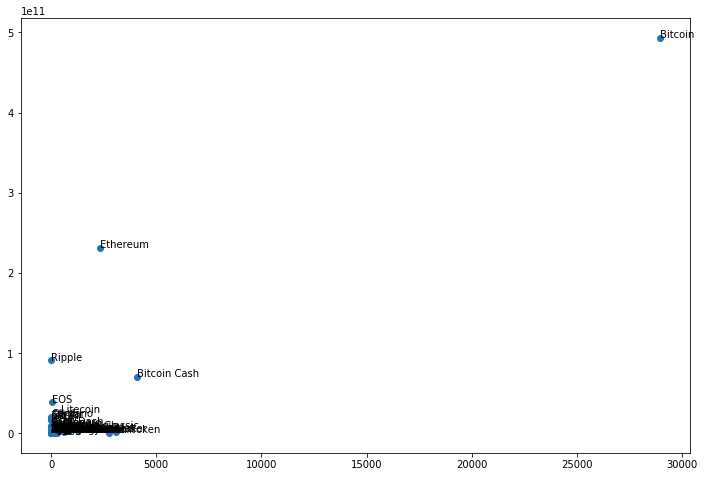

In [1]:
import numpy as np
import os
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.interactive(False)

df = pd.read_csv(
    "lista_de_usuarios.csv",
    usecols=[0,1,2],
    header=None,
    names=['index','price','market_cap'],
    sep=";",
    index_col=0,
    encoding="utf-8"
)

plt.figure(figsize=(12, 8))
plt.scatter(df['price'], df['market_cap'])

for i, o in enumerate(df.iterrows()):
    plt.annotate(o[0], (o[1].price,o[1].market_cap))

plt.show()

## Parabéns

Terminamos por aqui. Não se esqueçam de checar o pós aula para mais dicas.

Qualquer dúvida meus contatos estão lá em cima!

![Acabou!](https://media.giphy.com/media/3o7qDEq2bMbcbPRQ2c/giphy.gif)